In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('DD', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,72.320000,70.139999,71.680000,70.320000,12044800.0,68.911163
2021-01-05,74.190002,69.980003,69.980003,73.779999,13269700.0,72.301834
2021-01-06,78.080002,74.410004,74.449997,77.750000,21014200.0,76.192299
2021-01-07,80.940002,77.970001,77.970001,80.879997,19333900.0,79.259575
2021-01-08,82.919998,80.459999,80.459999,81.790001,14651700.0,80.151352
...,...,...,...,...,...,...
2022-03-29,78.980003,77.470001,77.540001,78.000000,2087200.0,78.000000
2022-03-30,78.019997,76.250000,77.779999,76.540001,1997900.0,76.540001
2022-03-31,76.220001,73.550003,75.830002,73.580002,2992000.0,73.580002


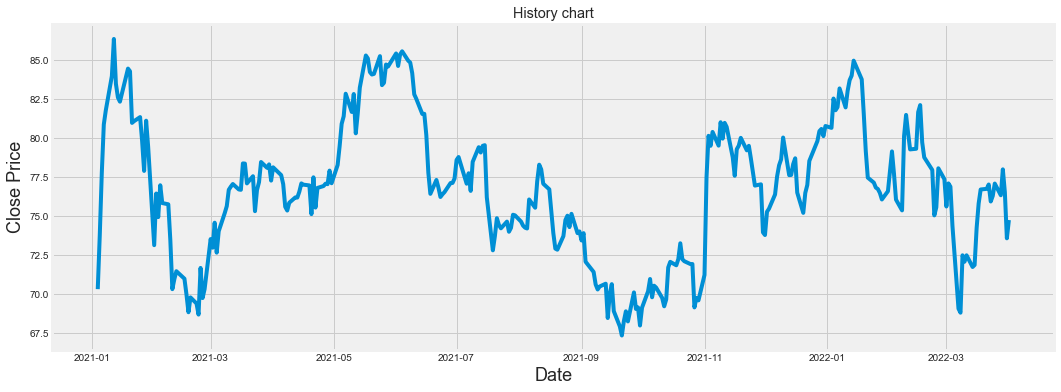

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15623361],
       [0.33824301],
       [0.5470805 ],
       [0.71173052],
       [0.75960025],
       [0.87480289],
       [1.        ],
       [0.8490267 ],
       [0.80273542],
       [0.78853215],
       [0.90005253],
       [0.89110997],
       [0.71699123],
       [0.72277729],
       [0.73645441],
       [0.65649668],
       [0.55497117],
       [0.72435575],
       [0.63650695],
       [0.30457655],
       [0.47869529],
       [0.39926371],
       [0.50657569],
       [0.44660689],
       [0.44239888],
       [0.32193593],
       [0.15623361],
       [0.18990006],
       [0.21672816],
       [0.19147812],
       [0.13887423],
       [0.07837968],
       [0.12835361],
       [0.10783813],
       [0.07048942],
       [0.22777493],
       [0.12624941],
       [0.15623361],
       [0.32509204],
       [0.29616014],
       [0.38032628],
       [0.27932691],
       [0.35139398],
       [0.41294043],
       [0.43608627],
       [0.49132051],
       [0.50184113],
       [0.510

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.15623361, 0.33824301, 0.5470805 , 0.71173052, 0.75960025,
       0.87480289, 1.        , 0.8490267 , 0.80273542, 0.78853215,
       0.90005253, 0.89110997, 0.71699123, 0.72277729, 0.73645441,
       0.65649668, 0.55497117, 0.72435575, 0.63650695, 0.30457655,
       0.47869529, 0.39926371, 0.50657569, 0.44660689, 0.44239888,
       0.32193593, 0.15623361, 0.18990006, 0.21672816, 0.19147812,
       0.13887423, 0.07837968, 0.12835361, 0.10783813, 0.07048942,
       0.22777493, 0.12624941, 0.15623361, 0.32509204, 0.29616014,
       0.38032628, 0.27932691, 0.35139398, 0.41294043, 0.43608627,
       0.49132051, 0.50184113, 0.51078369, 0.49237241, 0.49132051,
       0.58022081, 0.57969506, 0.5128879 , 0.53708564, 0.41925304,
       0.49079436, 0.5170963 , 0.58495537, 0.56549178, 0.5770647 ])]
[0.5223566117465368]

[array([0.15623361, 0.33824301, 0.5470805 , 0.71173052, 0.75960025,
       0.87480289, 1.        , 0.8490267 , 0.80273542, 0.78853215,
       0.90005253, 0.89110997, 0.716

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 3s 148ms/step - loss: 0.2319
Epoch 2/256
2/2 [==============================] - 0s 134ms/step - loss: 0.0423
Epoch 3/256
2/2 [==============================] - 0s 132ms/step - loss: 0.0663
Epoch 4/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0331
Epoch 5/256
2/2 [==============================] - 0s 127ms/step - loss: 0.0250
Epoch 6/256
2/2 [==============================] - 0s 135ms/step - loss: 0.0338
Epoch 7/256
2/2 [==============================] - 0s 134ms/step - loss: 0.0339
Epoch 8/256
2/2 [==============================] - 0s 138ms/step - loss: 0.0265
Epoch 9/256
2/2 [==============================] - 0s 156ms/step - loss: 0.0215
Epoch 10/256
2/2 [==============================] - 0s 133ms/step - loss: 0.0228
Epoch 11/256
2/2 [==============================] - 0s 161ms/step - loss: 0.0248
Epoch 12/256
2/2 [==============================] - 0s 147ms/step - loss: 0.0227
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.3097655323334099

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14496/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


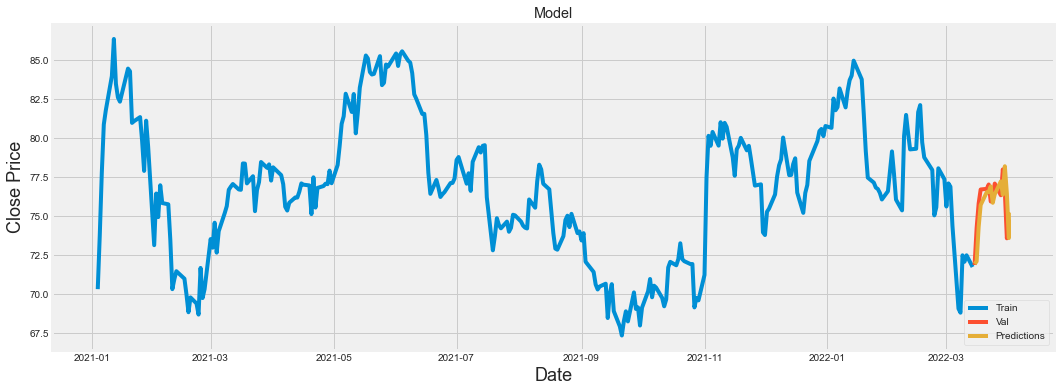

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,71.870003,71.936142
2022-03-16,74.239998,72.096687
2022-03-17,75.809998,74.302399
2022-03-18,76.709999,75.714783
2022-03-21,76.750000,76.533119
2022-03-22,77.029999,76.557030
2022-03-23,75.940002,76.905861
2022-03-24,76.300003,75.857910
2022-03-25,77.089996,76.408813
